In [1]:
import numpy as np
import pandas as pd

In [2]:
cl = pd.read_csv("clinical.csv")

In [117]:
len(cl)

190

In [3]:
cl.isnull().sum()

ID                    0
Outcome               0
Survival.Months       0
Age                   0
Grade                 0
Num.Primaries         0
T                     0
N                    65
M                    96
Radiation             0
Stage                 0
Primary.Site          0
Histology             0
Tumor.Size           92
Num.Mutated.Genes     0
Num.Mutations         0
dtype: int64

In [6]:
cl['N'].fillna(cl.groupby('Outcome')['N'].transform('median'), inplace = True)

In [7]:
cl['M'].fillna(cl.groupby('Outcome')['M'].transform('median'), inplace = True)

In [8]:
cl['Tumor.Size'].fillna(cl.groupby('Outcome')['Tumor.Size'].transform('median'), inplace = True)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
cl.head()

,ID,Outcome,Survival.Months,Age,Grade,Num.Primaries,T,N,M,Radiation,Stage,Primary.Site,Histology,Tumor.Size,Num.Mutated.Genes,Num.Mutations
0,1,Alive,9.0,67,4,0,UNK,2.0,0.0,0,IV,Left Lower Lobe,Squamous cell carcinoma,1.4,8,8
1,2,Dead,19.0,73,2,0,UNK,2.0,0.0,5,IV,Right Upper Lobe,Adenocarcinoma,4.0,2,2
2,3,Dead,13.0,72,3,0,2,2.0,0.0,0,IIIA,Right Upper Lobe,Adenocarcinoma,1.5,1,1
3,4,Dead,15.0,69,9,1,1a,0.0,1.0,0,IA,Right Upper Lobe,Adenocarcinoma,4.0,4,4
4,5,Dead,10.0,76,9,0,UNK,2.0,0.0,0,IIIA,Left Hilar,Large-cell carcinoma,4.0,3,3


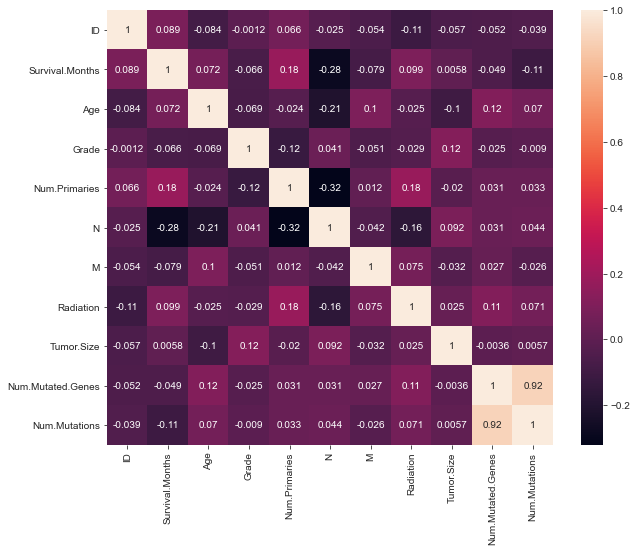

In [15]:
plt.figure(figsize = (10, 8))
sns.heatmap(cl.corr(), annot = True)
plt.show()

In [17]:
cl.columns

Index(['ID', 'Outcome', 'Survival.Months', 'Age', 'Grade', 'Num.Primaries',
       'T', 'N', 'M', 'Radiation', 'Stage', 'Primary.Site', 'Histology',
       'Tumor.Size', 'Num.Mutated.Genes', 'Num.Mutations'],
      dtype='object')

In [ ]:
plot_cl = cl[[]]

In [20]:
cl.nunique()

ID                   190
Outcome                2
Survival.Months       28
Age                   20
Grade                  4
Num.Primaries          2
T                      9
N                      4
M                      2
Radiation              2
Stage                  9
Primary.Site           9
Histology              3
Tumor.Size            19
Num.Mutated.Genes      9
Num.Mutations          9
dtype: int64

C:\Users\rashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


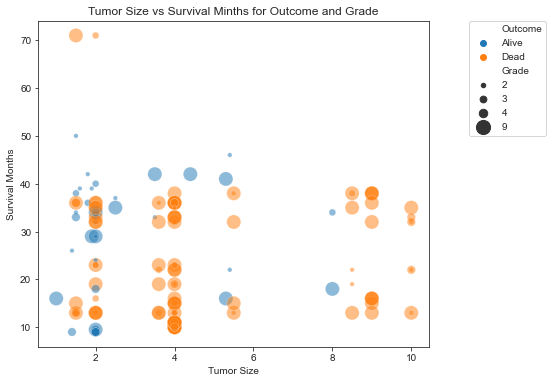

In [132]:
plt.figure(figsize=(7, 6))
sns.scatterplot("Tumor.Size", "Survival.Months", hue = 'Outcome', size = "Grade",
                sizes = (20, 200),
                alpha = 0.5,
                data = cl)
plt.legend(bbox_to_anchor = (1.3, 1), borderaxespad=0)
plt.xlabel("Tumor Size")
plt.ylabel("Survival Months")
plt.title("Tumor Size vs Survival Minths for Outcome and Grade")
plt.show()

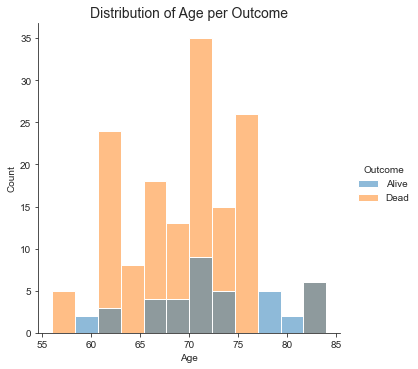

In [141]:
sns.displot(x = "Age", hue= "Outcome", data = cl)
plt.title("Distribution of Age per Outcome", fontsize = 14)
plt.show()

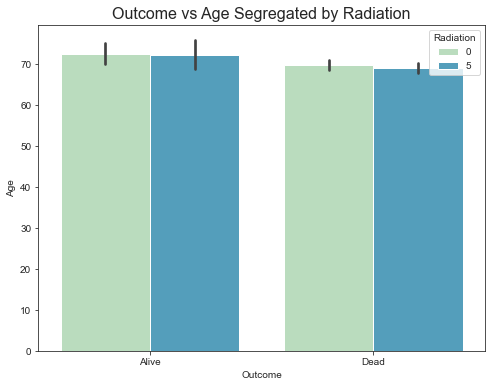

In [142]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Outcome', y= 'Age', hue='Radiation', 
            palette = 'GnBu',
            data=cl)
plt.xlabel("Outcome")
plt.ylabel("Age")
plt.title("Outcome vs Age Segregated by Radiation", fontsize = 16)
plt.show()

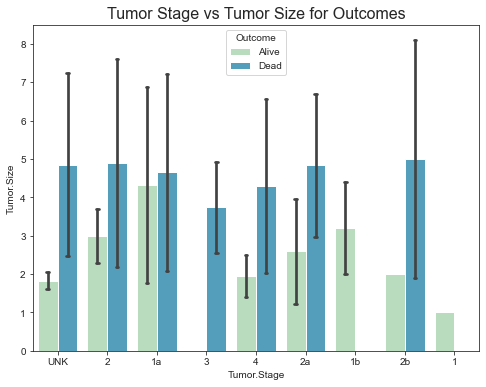

In [41]:
plt.figure(figsize=(8, 6))
sns.barplot(x='T', y= 'Tumor.Size', hue='Outcome', 
            palette = 'GnBu',
            data=cl, ci='sd',
           capsize=0.05,)
plt.xlabel("Tumor.Stage")
plt.ylabel("Tumor.Size")
plt.title("Tumor Stage vs Tumor Size for Outcomes", fontsize = 16)
plt.show()

In [42]:
cl.columns

Index(['ID', 'Outcome', 'Survival.Months', 'Age', 'Grade', 'Num.Primaries',
       'T', 'N', 'M', 'Radiation', 'Stage', 'Primary.Site', 'Histology',
       'Tumor.Size', 'Num.Mutated.Genes', 'Num.Mutations'],
      dtype='object')

<Figure size 576x432 with 0 Axes>

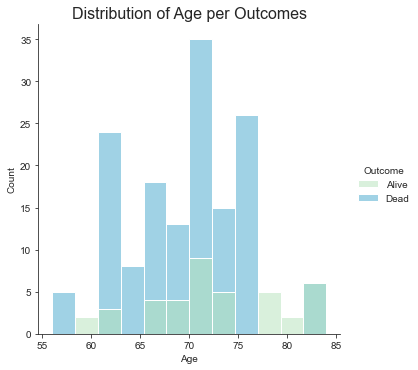

In [47]:
plt.figure(figsize=(8, 6))
sns.displot(x = 'Age', hue='Outcome', 
            palette = 'GnBu',
            data=cl)
plt.xlabel("Age")
plt.title("Distribution of Age per Outcomes", fontsize = 16)
plt.show()

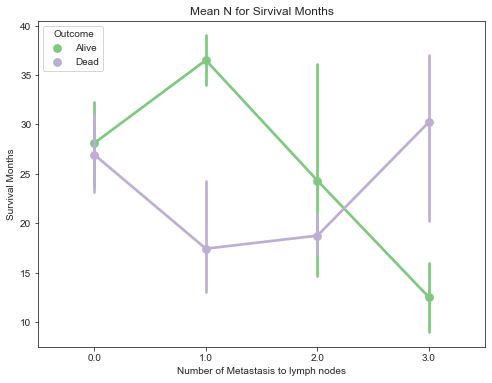

In [50]:
plt.figure(figsize=(8, 6))
sns.pointplot(x="N", y="Survival.Months", hue="Outcome", data=cl, palette="Accent")
plt.xlabel("Number of Metastasis to lymph nodes")
plt.ylabel("Survival Months")
plt.title("Mean Number of Metastasis to Lymph Nodes for Sirvival Months")
plt.show()

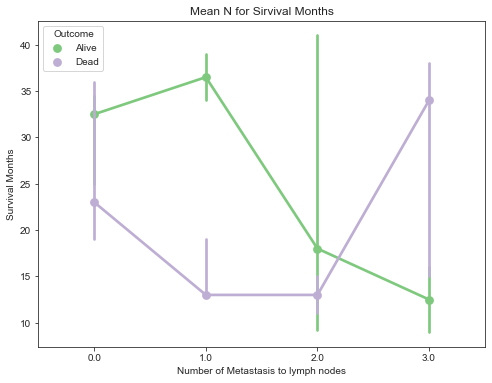

In [52]:
from numpy import median
plt.figure(figsize=(8, 6))
sns.pointplot(x="N", y="Survival.Months", hue="Outcome", data=cl, 
              palette="Accent", estimator = median)
plt.xlabel("Number of Metastasis to lymph nodes")
plt.ylabel("Survival Months")
plt.title("Mean N for Sirvival Months")
plt.show()

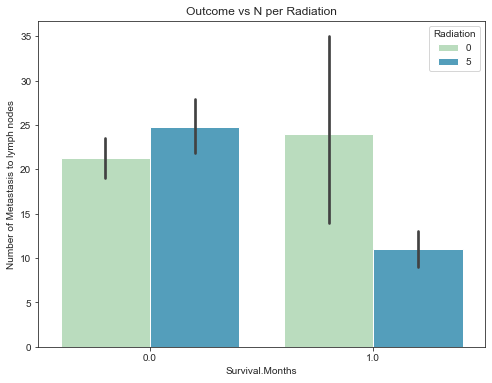

In [148]:
plt.figure(figsize=(8, 6))
sns.barplot(x='M', y= 'Survival.Months', hue='Radiation', 
            palette = 'GnBu',
            data=cl)
plt.xlabel("Survival.Months")
plt.ylabel("Number of Metastasis to lymph nodes")
plt.title("Outcome vs N per Radiation")
plt.show()

In [144]:
cl['Outcome1'] = cl['Outcome'].replace({'Alive': 1, "Dead": 0})

This plot shows the Number of mutated Genes against Survival Months. Outcomes are also separated by color.

<AxesSubplot:xlabel='Num.Mutated.Genes', ylabel='Survival.Months'>

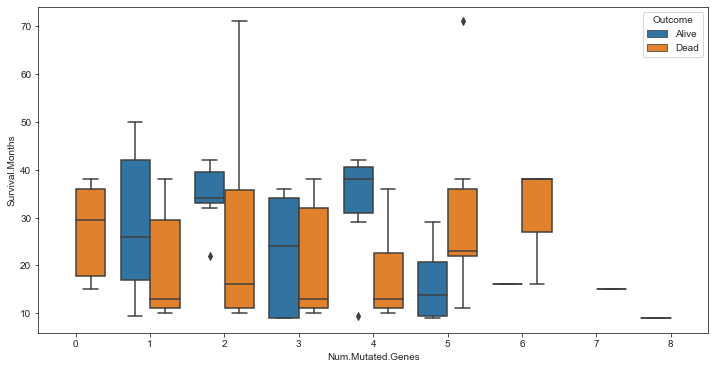

In [79]:
plt.figure(figsize=(12, 6))
sns.boxplot(x = "Num.Mutated.Genes", y= 'Survival.Months', hue = "Outcome", data =cl)

<AxesSubplot:xlabel='Num.Mutated.Genes', ylabel='Survival.Months'>

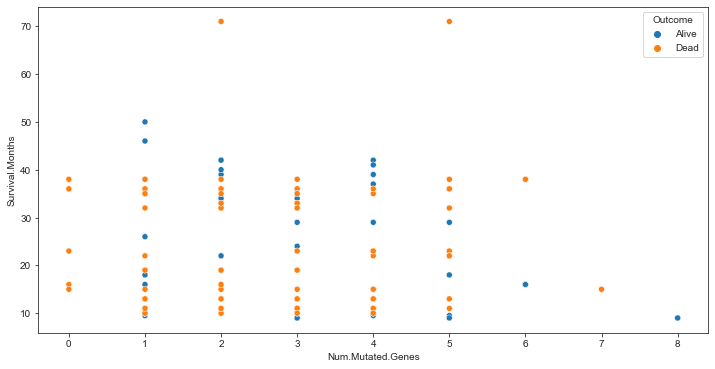

In [150]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x = "Num.Mutated.Genes", y= 'Survival.Months', hue = "Outcome", data =cl)

<AxesSubplot:xlabel='Num.Mutations', ylabel='Survival.Months'>

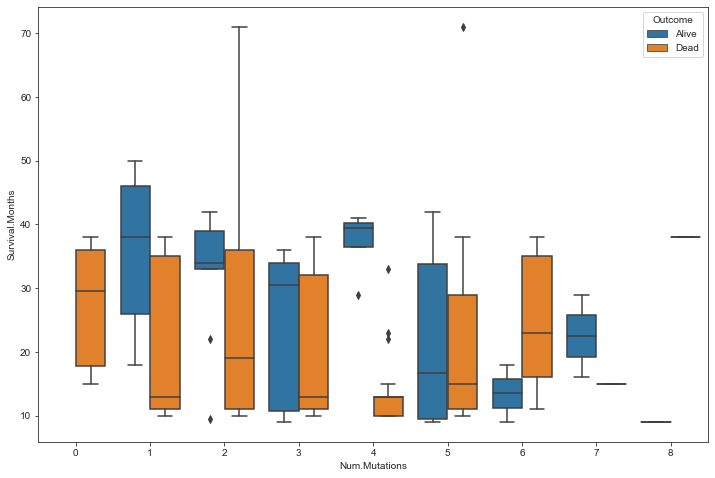

In [76]:
plt.figure(figsize=(12, 8))
sns.boxplot(x = "Num.Mutations", y= 'Survival.Months', hue = "Outcome", data =cl)

In [69]:
gen = pd.read_csv('genomics.csv')

In [70]:
cl1 = cl.set_index('ID').join(gen.set_index('ID'), how = 'left', on = 'ID')

In [71]:
cl2 = cl1[cl1['Survival.Months'] >= 12]
cl2

,Outcome,Survival.Months,Age,Grade,Num.Primaries,T,N,M,Radiation,Stage,Primary.Site,Histology,Tumor.Size,Num.Mutated.Genes,Num.Mutations,Outcome1,Gene
ID,,,,,,,,,,,,,,,,,
2,Dead,19.0,73,2,0,UNK,2.0,0.0,5,IV,Right Upper Lobe,Adenocarcinoma,4.0,2,2,0,SMO
2,Dead,19.0,73,2,0,UNK,2.0,0.0,5,IV,Right Upper Lobe,Adenocarcinoma,4.0,2,2,0,TP53_Col1
3,Dead,13.0,72,3,0,2,2.0,0.0,0,IIIA,Right Upper Lobe,Adenocarcinoma,1.5,1,1,0,STK11
4,Dead,15.0,69,9,1,1a,0.0,1.0,0,IA,Right Upper Lobe,Adenocarcinoma,4.0,4,4,0,CDKN2A
4,Dead,15.0,69,9,1,1a,0.0,1.0,0,IA,Right Upper Lobe,Adenocarcinoma,4.0,4,4,0,MET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Dead,32.0,67,4,1,1a,2.0,0.0,0,IV,Right Upper Lobe,Adenocarcinoma,10.0,3,3,0,CDKN2A
189,Dead,32.0,67,4,1,1a,2.0,0.0,0,IV,Right Upper Lobe,Adenocarcinoma,10.0,3,3,0,FBXW7
189,Dead,32.0,67,4,1,1a,2.0,0.0,0,IV,Right Upper Lobe,Adenocarcinoma,10.0,3,3,0,TP53_Col1


In [81]:
cl2['Gene'].nunique()

46

In [152]:
cl2['Outcome'].value_counts()

1    270
2     79
Name: Outcome, dtype: int64

In [88]:
def conversion(col):
    un = cl2[col].unique()
    d = {}
    unq_val = 0
    for i in un:
        if i not in d:
            d[i] = unq_val + 1
            unq_val += 1
    return d    

In [84]:
conversion("Outcome")

{'Alive': 1, 'Dead': 2}

In [89]:
dt = cl2.dtypes
dt

Outcome               object
Survival.Months      float64
Age                    int64
Grade                  int64
Num.Primaries          int64
T                     object
N                    float64
M                    float64
Radiation              int64
Stage                 object
Primary.Site          object
Histology             object
Tumor.Size           float64
Num.Mutated.Genes      int64
Num.Mutations          int64
Outcome1               int64
Gene                  object
dtype: object

In [90]:
for i in cl2.columns:
    if dt[i] == 'object':
        cl2[i] = cl2[i].replace(conversion(i))

<ipython-input-90-722745fa6215>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl2[i] = cl2[i].replace(conversion(i))


In [154]:
cl2

,Outcome,Survival.Months,Age,Grade,Num.Primaries,T,N,M,Radiation,Stage,Primary.Site,Histology,Tumor.Size,Num.Mutated.Genes,Num.Mutations,Outcome1,Gene
ID,,,,,,,,,,,,,,,,,
2,1,19.0,73,2,0,1,2.0,0.0,5,1,1,1,4.0,2,2,0,1
2,1,19.0,73,2,0,1,2.0,0.0,5,1,1,1,4.0,2,2,0,2
3,1,13.0,72,3,0,2,2.0,0.0,0,2,1,1,1.5,1,1,0,3
4,1,15.0,69,9,1,3,0.0,1.0,0,3,1,1,4.0,4,4,0,4
4,1,15.0,69,9,1,3,0.0,1.0,0,3,1,1,4.0,4,4,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,1,32.0,67,4,1,3,2.0,0.0,0,1,1,1,10.0,3,3,0,4
189,1,32.0,67,4,1,3,2.0,0.0,0,1,1,1,10.0,3,3,0,11
189,1,32.0,67,4,1,3,2.0,0.0,0,1,1,1,10.0,3,3,0,2


In [158]:
X = cl2.drop(columns = ["Outcome", "Outcome1"])
y = cl2['Outcome']

In [159]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25,
                                                   random_state=35)

In [160]:
from sklearn.linear_model import LogisticRegression

In [161]:
clf=LogisticRegression(random_state=0).fit(x_train, y_train)
clf.score(x_train, y_train)

C:\Users\rashi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8659003831417624

In [163]:
clf.score(x_test, y_test)

0.8295454545454546

In [164]:
cl2['Outcome'].value_counts()

1    270
2     79
Name: Outcome, dtype: int64

In [165]:
y_pred = clf.predict(x_test)

In [166]:
from sklearn.metrics import confusion_matrix

In [167]:
def tpr_tnr(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tpr = tp/(tp+fn)
    tnr = tn/(tn+fp)
    precision = tn/(tn+fn)
    recall = tn/(tn+fp)
    f1_score = 2*precision*recall/(precision + recall)   
    return tpr, tnr, precision, recall, f1_score

In [168]:
tpr, tnr, precision, recall, f1_score = tpr_tnr(y_test, y_pred)
tpr, tnr, precision, recall, f1_score

(0.625, 0.90625, 0.8656716417910447, 0.90625, 0.8854961832061069)

C:\Users\rashi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


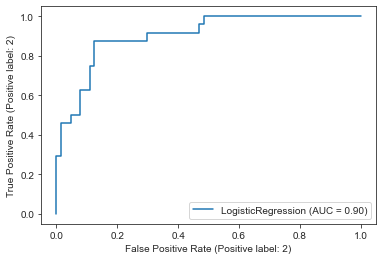

In [169]:
from sklearn import metrics
metrics.plot_roc_curve(clf, x_test, y_test)

In [238]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [239]:
uni = SelectKBest(score_func = f_classif, k = 10)
fit = uni.fit(X, y)

In [240]:
X1_cols = X.columns[fit.get_support(indices=True)].tolist()

In [241]:
X1_cols

['Survival.Months',
 'Age',
 'Grade',
 'Num.Primaries',
 'T',
 'N',
 'Primary.Site',
 'Histology',
 'Tumor.Size',
 'Gene']

In [181]:
cor = cl2.drop(columns = 'Outcome1').corr()
cor_target = abs(cor["Outcome"])
relevant_features = cor_target[cor_target > 0.15]
relevant_features.index

Index(['Outcome', 'Survival.Months', 'Age', 'Num.Primaries', 'T', 'N',
       'Primary.Site', 'Histology', 'Tumor.Size', 'Gene'],
      dtype='object')

In [112]:
X1 = X[X1_cols]

In [114]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X1, y, 
                                                    test_size = 0.25,
                                                   random_state=35)

In [190]:
clf=LogisticRegression(random_state=0).fit(x_train, y_train)
clf.score(x_train, y_train)

C:\Users\rashi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8659003831417624

In [191]:
clf.score(x_test, y_test)

0.8295454545454546

In [192]:
y_pred = clf.predict(x_test)

In [193]:
tpr, tnr, precision, recall, f1_score = tpr_tnr(y_test, y_pred)
tpr, tnr, precision, recall, f1_score

(0.625, 0.90625, 0.8656716417910447, 0.90625, 0.8854961832061069)

C:\Users\rashi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


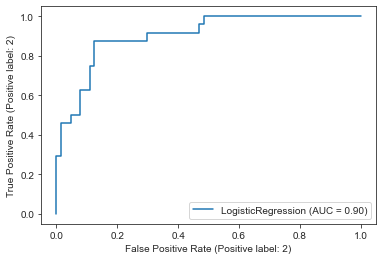

In [195]:
from sklearn import metrics
metrics.plot_roc_curve(clf, x_test, y_test)

In [196]:
from sklearn.ensemble import RandomForestClassifier

In [202]:
from sklearn.model_selection import GridSearchCV

In [206]:
params = {'max_depth': [5, 6, 7, 8, 9]
         }

In [207]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state = 23)
rfc_cv = GridSearchCV(rfc, params)

In [208]:
rfc_cv.fit(x_train, y_train)
rfc_cv.score(x_train, y_train)

0.9961685823754789

In [209]:
rfc_cv.score(x_test, y_test)

0.9318181818181818

In [210]:
y_pred = rfc_cv.predict(x_test)

In [211]:
tpr, tnr, precision, recall, f1_score = tpr_tnr(y_test, y_pred)
tpr, tnr, precision, recall, f1_score

(0.8333333333333334, 0.96875, 0.9393939393939394, 0.96875, 0.9538461538461539)

In [220]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0).fit(x_train, y_train)
dt.score(x_train, y_train)

1.0

In [221]:
dt.score(x_test, y_test)

0.8977272727272727

In [222]:
y_pred = dt.predict(x_test)

In [223]:
tpr, tnr, precision, recall, f1_score = tpr_tnr(y_test, y_pred)
tpr, tnr, precision, recall, f1_score

(0.7916666666666666, 0.9375, 0.9230769230769231, 0.9375, 0.9302325581395349)

In [225]:
cl3 = cl2.drop(columns = 'Outcome1')

In [233]:
cl3['nm'] = cl3['N']/cl3['M']

In [235]:
cl3.columns

Index(['Outcome', 'Survival.Months', 'Age', 'Grade', 'Num.Primaries', 'T', 'N',
       'M', 'Radiation', 'Stage', 'Primary.Site', 'Histology', 'Tumor.Size',
       'Num.Mutated.Genes', 'Num.Mutations', 'Gene', 'n/m', 'nmg', 'nm'],
      dtype='object')

In [234]:
cl3['nmg'] = cl3['Num.Mutated.Genes']*cl3['Grade']

In [262]:
cl3['smn'] = cl3['Age']/cl3['Survival.Months']

In [250]:
X1_cols.append('nmg')

In [263]:
X1_cols.append('smn')

In [293]:
cl3['gn'] = cl3['Gene']*cl3['N']

In [294]:
X1_cols.append('gn')

In [297]:
X1_cols

['Survival.Months',
 'Age',
 'Grade',
 'Num.Primaries',
 'T',
 'N',
 'Primary.Site',
 'Histology',
 'Tumor.Size',
 'Gene',
 'nmg',
 'smn',
 'gn']

In [298]:
X1 = cl3[X1_cols]

In [291]:
cl2.corr()

,Outcome,Survival.Months,Age,Grade,Num.Primaries,T,N,M,Radiation,Stage,Primary.Site,Histology,Tumor.Size,Num.Mutated.Genes,Num.Mutations,Outcome1,Gene
Outcome,1.000000,0.204990,0.159927,-0.143842,0.246388,0.201296,-0.266563,-0.122402,-0.123618,-0.037034,0.331706,0.187859,-0.289998,-0.032826,0.021857,1.000000,0.300583
Survival.Months,0.204990,1.000000,0.138614,-0.083157,0.021162,-0.252939,-0.085941,-0.178991,-0.152904,0.133539,-0.027258,-0.119939,-0.120064,-0.043810,-0.063460,0.204990,0.067017
Age,0.159927,0.138614,1.000000,-0.068442,-0.145165,-0.061494,-0.179635,0.089994,-0.154601,0.236934,-0.103319,0.031324,-0.003190,0.111735,0.102056,0.159927,-0.059296
Grade,-0.143842,-0.083157,-0.068442,1.000000,-0.025458,0.037061,0.008407,-0.054273,0.012099,0.063418,-0.092799,0.028642,0.085501,0.065438,0.073375,-0.143842,0.036969
Num.Primaries,0.246388,0.021162,-0.145165,-0.025458,1.000000,0.035220,-0.198327,-0.001918,0.083260,0.025038,0.192995,0.213922,-0.078865,-0.025409,0.005558,0.246388,0.114325
T,0.201296,-0.252939,-0.061494,0.037061,0.035220,1.000000,-0.067370,0.062975,0.039935,0.076345,0.094284,0.121168,-0.203453,0.163934,0.198103,0.201296,0.038826
N,-0.266563,-0.085941,-0.179635,0.008407,-0.198327,-0.067370,1.000000,0.020851,0.093167,-0.115007,-0.120870,0.087757,0.116950,0.139377,0.114896,-0.266563,-0.131284
M,-0.122402,-0.178991,0.089994,-0.054273,-0.001918,0.062975,0.020851,1.000000,0.006816,0.053092,-0.162878,-0.079836,0.011428,-0.006366,-0.057766,-0.122402,-0.094933
Radiation,-0.123618,-0.152904,-0.154601,0.012099,0.083260,0.039935,0.093167,0.006816,1.000000,-0.042827,0.075473,-0.072679,-0.034820,0.038601,-0.005114,-0.123618,-0.019787
Stage,-0.037034,0.133539,0.236934,0.063418,0.025038,0.076345,-0.115007,0.053092,-0.042827,1.000000,0.007614,0.111935,-0.021814,0.138018,0.157983,-0.037034,0.081854


In [299]:
x_train, x_test, y_train, y_test = train_test_split(X1, y, 
                                                    test_size = 0.25,
                                                   random_state=35)

In [300]:
rfc = RandomForestClassifier(random_state = 23)
rfc_cv = GridSearchCV(rfc, params)

In [301]:
rfc_cv.fit(x_train, y_train)
rfc_cv.score(x_train, y_train)

1.0

In [302]:
rfc_cv.score(x_test, y_test)

0.9659090909090909

In [303]:
y_pred = rfc_cv.predict(x_test)

In [304]:
tpr, tnr, precision, recall, f1_score = tpr_tnr(y_test, y_pred)
tpr, tnr, precision, recall, f1_score

(0.9583333333333334, 0.96875, 0.9841269841269841, 0.96875, 0.9763779527559054)